In [28]:
!pip install plotly==5.10.0

In [29]:
#!pip install mlxtend
!pip install apyori

In [30]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from apyori import apriori as ap

In [31]:
movies_data = pd.read_csv('movies.csv') 
movies_data.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
movies_data.shape

(9742, 3)

In [33]:
movies_data.movieId.duplicated().sum() #To get the number of duplicates in the movieId column

0

In [34]:
ratings_data = pd.read_csv('ratings.csv') 
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [35]:
ratings_data.shape

(100836, 4)

In [36]:
#to get the users that watch the movies, the ratings data needs to be joined with the movie data
movies_rate = movies_data.merge(ratings_data, on='movieId')
movies_rate.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Since Apriori works with a list of lists, we convert our data into that.

In [37]:
#Using list comprehension to get the movies each user has watched (rated)
user_movies = [movies_rate.title[movies_rate.userId==i].tolist() for i in movies_rate.userId.unique()]
user_movies[:5]

[['Toy Story (1995)',
  'Grumpier Old Men (1995)',
  'Heat (1995)',
  'Seven (a.k.a. Se7en) (1995)',
  'Usual Suspects, The (1995)',
  'From Dusk Till Dawn (1996)',
  'Bottle Rocket (1996)',
  'Braveheart (1995)',
  'Rob Roy (1995)',
  'Canadian Bacon (1995)',
  'Desperado (1995)',
  'Billy Madison (1995)',
  'Clerks (1994)',
  'Dumb & Dumber (Dumb and Dumber) (1994)',
  'Ed Wood (1994)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Pulp Fiction (1994)',
  'Stargate (1994)',
  'Tommy Boy (1995)',
  'Clear and Present Danger (1994)',
  'Forrest Gump (1994)',
  'Jungle Book, The (1994)',
  'Mask, The (1994)',
  'Blown Away (1994)',
  'Dazed and Confused (1993)',
  'Fugitive, The (1993)',
  'Jurassic Park (1993)',
  'Mrs. Doubtfire (1993)',
  "Schindler's List (1993)",
  'So I Married an Axe Murderer (1993)',
  'Three Musketeers, The (1993)',
  'Tombstone (1993)',
  'Dances with Wolves (1990)',
  'Batman (1989)',
  'Silence of the Lambs, The (1991)',
  'Pinocchio (1940)',
  'Fargo (1

## Implementation

In [38]:
te = TransactionEncoder() #Initialize the function
te_1 = te.fit_transform(user_movies) 
df = pd.DataFrame(te_1, columns=te.columns_)
df.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
df.shape

(610, 9719)

In [40]:
top20 = df.sum().sort_values(ascending=False).iloc[:20] #Top 20 most watched movies

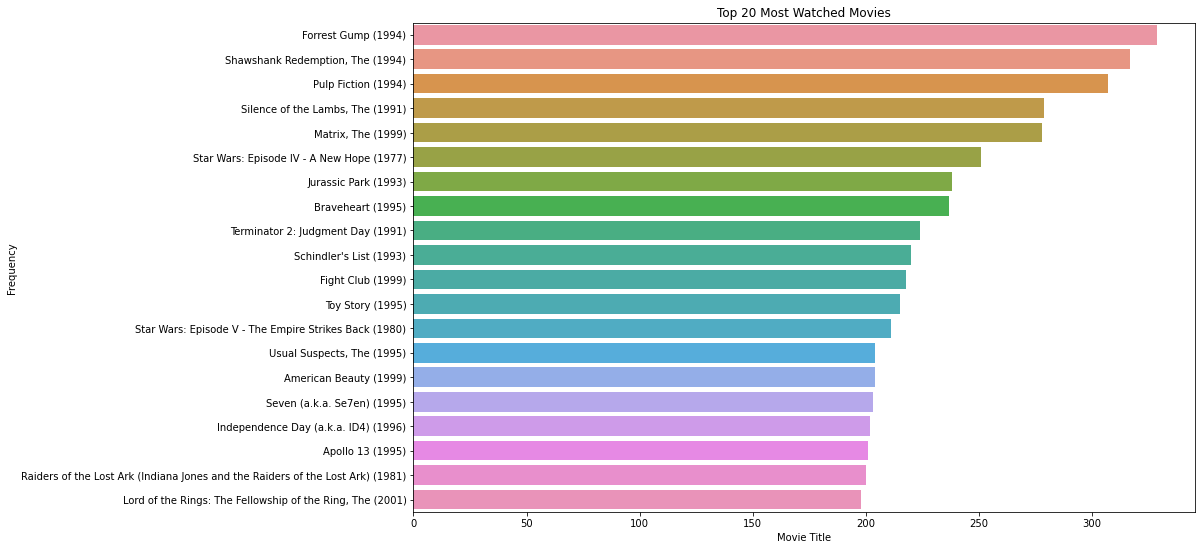

In [41]:
plt.figure(figsize=(14,9))
sns.barplot(y=top20.index, x=top20.values, orient = 'h')
plt.title('Top 20 Most Watched Movies')
plt.ylabel('Frequency')
plt.xlabel('Movie Title')
plt.show()

In [42]:
rules = list(ap(user_movies, min_confidence=0.5, min_length=2, min_support=0.2))

In [43]:
len(rules) #To get the number of rules

332

In [44]:
rules_no_null = [i for i in rules if len(i[0])>1] #To ensure there are no rules with empty antecendents and consequents

In [45]:
rules_dict = [{
    'Antecedent': i[2][0][0],
    'Consequent': i[2][0][1],
    'Support': i[1],
    'Confidence': i[2][0][2],
    'Lift': i[2][0][3]}
    for i in rules_no_null
]

In [46]:
ass_rulesDF = pd.DataFrame(rules_dict)
ass_rulesDF

,Antecedent,Consequent,Support,Confidence,Lift
0,(Ace Ventura: Pet Detective (1994)),(Forrest Gump (1994)),0.208197,0.788820,1.462554
1,(Ace Ventura: Pet Detective (1994)),(Pulp Fiction (1994)),0.203279,0.770186,1.530338
2,(Aladdin (1992)),(Beauty and the Beast (1991)),0.201639,0.672131,2.808219
3,(Aladdin (1992)),(Forrest Gump (1994)),0.231148,0.770492,1.428571
4,(Aladdin (1992)),(Jurassic Park (1993)),0.213115,0.710383,1.820728
...,...,...,...,...,...
324,(Star Wars: Episode V - The Empire Strikes Bac...,"(Forrest Gump (1994), Star Wars: Episode IV - ...",0.200000,0.578199,2.671980
325,(Lord of the Rings: The Fellowship of the Ring...,"(Lord of the Rings: The Return of the King, Th...",0.213115,0.656566,3.011316
326,(Raiders of the Lost Ark (Indiana Jones and th...,(Star Wars: Episode V - The Empire Strikes Bac...,0.200000,0.610000,2.296914
327,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.221311,0.537849,2.326863


In [47]:
ass_rulesDF.nlargest(10,'Lift') #Top 10 rules with the highest lift

,Antecedent,Consequent,Support,Confidence,Lift
108,"(Godfather, The (1972))","(Godfather: Part II, The (1974))",0.204918,0.651042,3.078569
261,"(Lord of the Rings: The Return of the King, Th...","(Forrest Gump (1994), Lord of the Rings: The T...",0.203279,0.670270,3.051230
325,(Lord of the Rings: The Fellowship of the Ring...,"(Lord of the Rings: The Return of the King, Th...",0.213115,0.656566,3.011316
288,(Lord of the Rings: The Fellowship of the Ring...,"(Lord of the Rings: The Return of the King, Th...",0.252459,0.777778,2.946860
291,"(Lord of the Rings: The Return of the King, Th...","(Matrix, The (1999), Lord of the Rings: The Tw...",0.218033,0.718919,2.943225
260,(Lord of the Rings: The Fellowship of the Ring...,"(Forrest Gump (1994), Lord of the Rings: The T...",0.204918,0.631313,2.873888
289,(Lord of the Rings: The Fellowship of the Ring...,"(Lord of the Rings: The Return of the King, Th...",0.224590,0.691919,2.851829
147,"(Lord of the Rings: The Return of the King, Th...","(Lord of the Rings: The Two Towers, The (2002))",0.263934,0.870270,2.823749
2,(Aladdin (1992)),(Beauty and the Beast (1991)),0.201639,0.672131,2.808219
290,(Lord of the Rings: The Fellowship of the Ring...,"(Matrix, The (1999), Lord of the Rings: The Tw...",0.221311,0.681818,2.791336


In [48]:
ass_rulesDF.nlargest(10,'Support') #Top 10 rules with the highest Support

,Antecedent,Consequent,Support,Confidence,Lift
89,(Forrest Gump (1994)),"(Shawshank Redemption, The (1994))",0.378689,0.702128,1.351097
84,(Forrest Gump (1994)),(Pulp Fiction (1994)),0.377049,0.699088,1.389068
176,(Pulp Fiction (1994)),"(Shawshank Redemption, The (1994))",0.363934,0.723127,1.391506
177,(Pulp Fiction (1994)),"(Silence of the Lambs, The (1991))",0.339344,0.674267,1.474204
91,(Forrest Gump (1994)),"(Silence of the Lambs, The (1991))",0.326230,0.604863,1.322461
201,"(Shawshank Redemption, The (1994))","(Silence of the Lambs, The (1991))",0.326230,0.627760,1.372522
74,(Forrest Gump (1994)),(Jurassic Park (1993)),0.324590,0.601824,1.542489
80,(Forrest Gump (1994)),"(Matrix, The (1999))",0.318033,0.589666,1.293871
218,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.311475,0.756972,2.188403
36,(Braveheart (1995)),(Forrest Gump (1994)),0.300000,0.772152,1.431649


In [49]:
ass_rulesDF.nlargest(10,'Confidence') #Top 10 rules with the highest Confidence

,Antecedent,Consequent,Support,Confidence,Lift
82,(Mrs. Doubtfire (1993)),(Forrest Gump (1994)),0.221311,0.937500,1.738222
83,(Pretty Woman (1990)),(Forrest Gump (1994)),0.204918,0.925926,1.716762
124,(Indiana Jones and the Last Crusade (1989)),(Raiders of the Lost Ark (Indiana Jones and th...,0.201639,0.878571,2.679643
147,"(Lord of the Rings: The Return of the King, Th...","(Lord of the Rings: The Two Towers, The (2002))",0.263934,0.870270,2.823749
93,(Speed (1994)),(Forrest Gump (1994)),0.237705,0.847953,1.572193
141,(Lord of the Rings: The Fellowship of the Ring...,"(Lord of the Rings: The Two Towers, The (2002))",0.272131,0.838384,2.720288
75,"(Lion King, The (1994))",(Forrest Gump (1994)),0.236066,0.837209,1.552273
140,(Lord of the Rings: The Fellowship of the Ring...,"(Lord of the Rings: The Return of the King, Th...",0.270492,0.833333,2.747748
52,(Dances with Wolves (1990)),(Pulp Fiction (1994)),0.222951,0.829268,1.647732
62,(Fight Club (1999)),"(Matrix, The (1999))",0.295082,0.825688,1.811762


In [50]:
ass_rulesDF_lift = ass_rulesDF.sort_values('Lift', ascending=False).reset_index(drop=True)
ass_rulesDF_lift['Antecedent_1']=ass_rulesDF_lift['Antecedent'].map(lambda x: ','.join(list(x)))
ass_rulesDF_lift['Consequent_1']=ass_rulesDF_lift['Consequent'].map(lambda x: ','.join(list(x)))

In [51]:
list_table = ass_rulesDF_lift.head(20).pivot(index='Antecedent_1', columns='Consequent_1', values='Lift')

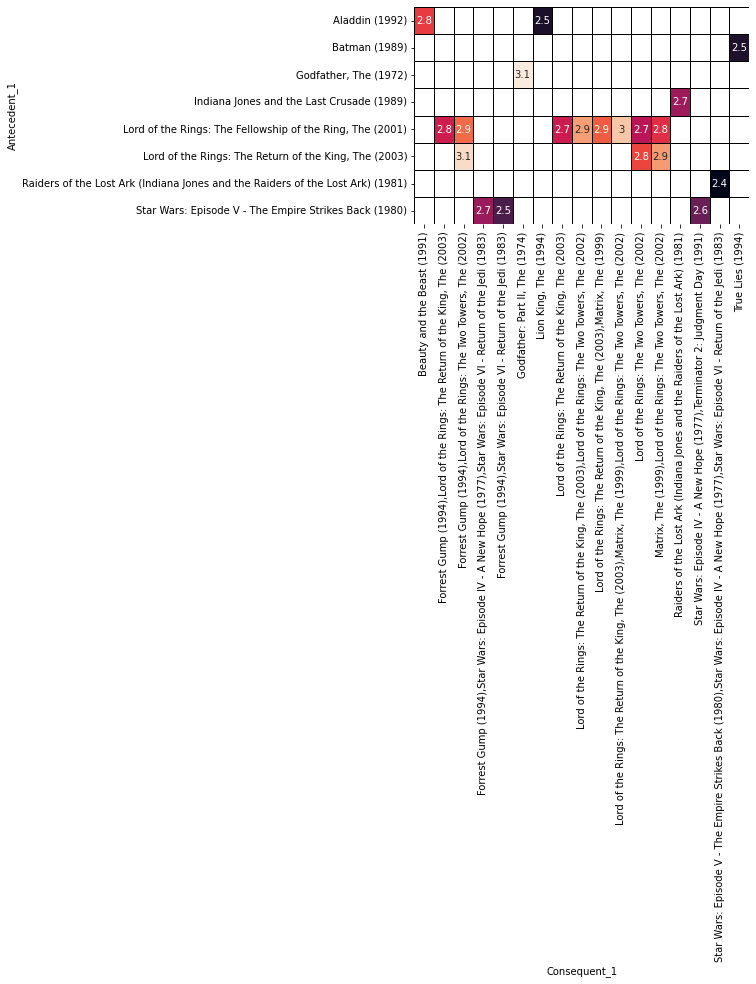

In [52]:
sns.heatmap(list_table, annot=True, cbar=False, linewidths=1, linecolor='black')
plt.show()